##This notebook will perform EDA and a number of NLP techniques on a dataset containing 10,000 yelp reviews and their corresponding rating. NLP Techniques will include Naive-Bayes, Random Forest, SVM, and sentiment analysis.

In [1]:
# Imports
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [2]:
# Import dataset as csv file --
# larger expanded versions (4GB-8GB) of this dataset are available on Kaggle
# or Directly from www.yelp.com/dataset
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [4]:
print('Shape of dataset: ', df.shape)

Shape of dataset:  (10000, 10)


In [5]:
print('Column names: \n', df.columns)

Column names: 
 Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [6]:
# Are these columns rated 1-5? Can't tell from df.head()
print('Funny max:', max(df['funny']))
print('Useful max:', max(df['useful']))
print('Cool max:', max(df['cool']))

Funny max: 57
Useful max: 76
Cool max: 77


In [7]:
print('Funny avg:', np.mean(df['funny']))
print('Useful avg:', np.mean(df['useful']))
print('Cool avg:', np.mean(df['cool']))

Funny avg: 0.7013
Useful avg: 1.4093
Cool avg: 0.8768


In [8]:
# Add a column to our dataframe that includes word length of the review
df['review_length'] = df['text'].apply(len)
df.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  review_length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0            889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0           1345  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0             76  
3  uZetl9T0NcROGOyFfughhg     1       2      0            419  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0            469

In [9]:
df.describe()

stars          cool        useful         funny  review_length
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000
mean       3.777500      0.876800      1.409300      0.701300     710.738700
std        1.214636      2.067861      2.336647      1.907942     617.399827
min        1.000000      0.000000      0.000000      0.000000       1.000000
25%        3.000000      0.000000      0.000000      0.000000     294.000000
50%        4.000000      0.000000      1.000000      0.000000     541.500000
75%        5.000000      1.000000      2.000000      1.000000     930.000000
max        5.000000     77.000000     76.000000     57.000000    4997.000000

Weird that the average values for funny, useful, and cool are between 0-2 but there seem to be some strong outliers. Will need to read more about the dataset and how these values are determined.

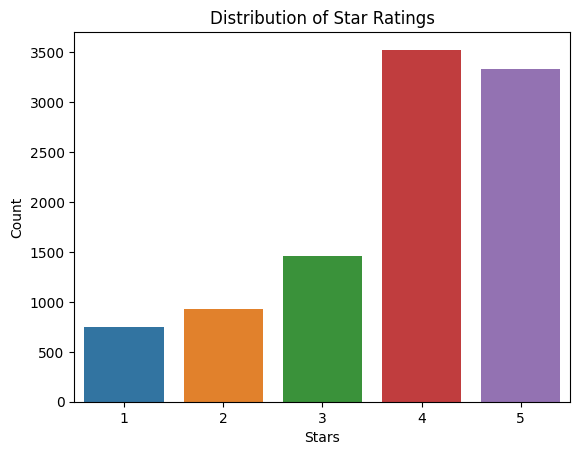

In [10]:
# Let's look at how the stars are distributed
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

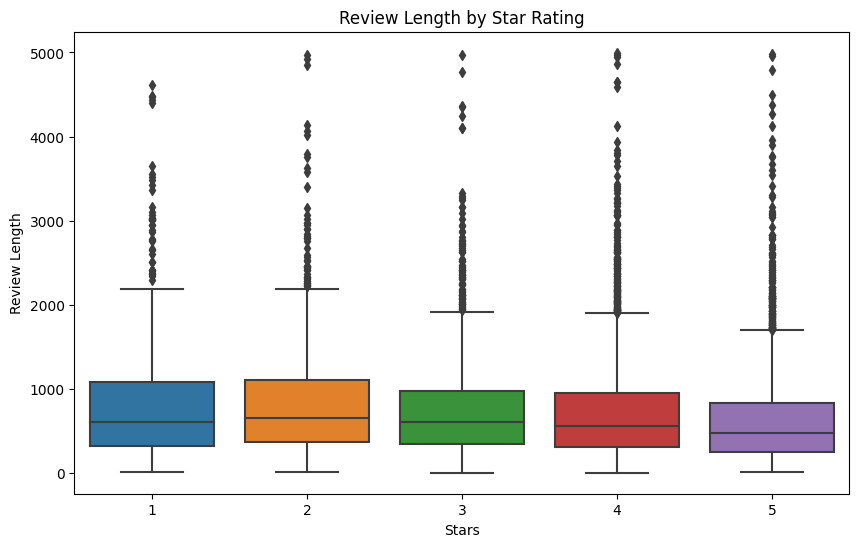

In [11]:
# Check to see if longer review correlates with higher or lower rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='review_length', data=df)
plt.title('Review Length by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Review Length')
plt.show()

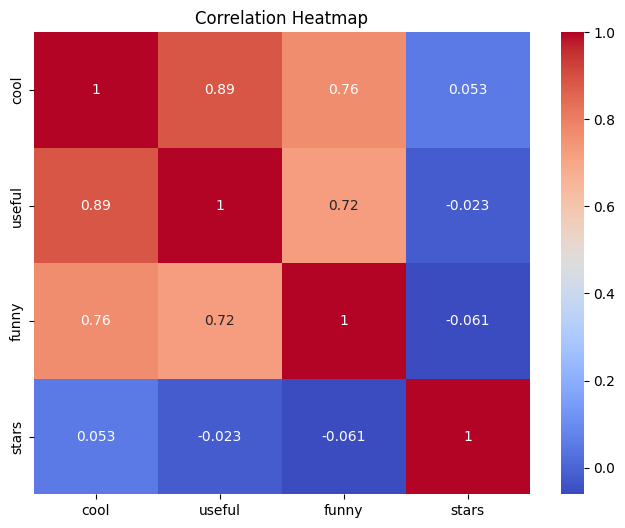

In [12]:
# Correlation heatmap between cool useful funny and stars
correlation_matrix = df[['cool', 'useful', 'funny', 'stars']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Interesting, it appears there is a NEGATIVE correlation with 'useful' and 'funny' ratings, and a POSITIVE correlation with 'cool' ratings. These three correlations are weak though.

Because these 'cool' 'useful' and 'funny' ratings are given by Yelp and we don't know how they're given, we will ignore them. We also don't need the
business IDs, dates, review IDs, etc.

In [13]:
df = df[['text', 'stars']]

In [14]:
df.head()

text  stars
0  My wife took me here on my birthday for breakf...      5
1  I have no idea why some people give bad review...      5
2  love the gyro plate. Rice is so good and I als...      4
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...      5
4  General Manager Scott Petello is a good egg!!!...      5

<ipython-input-15-d7c0c4804ff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


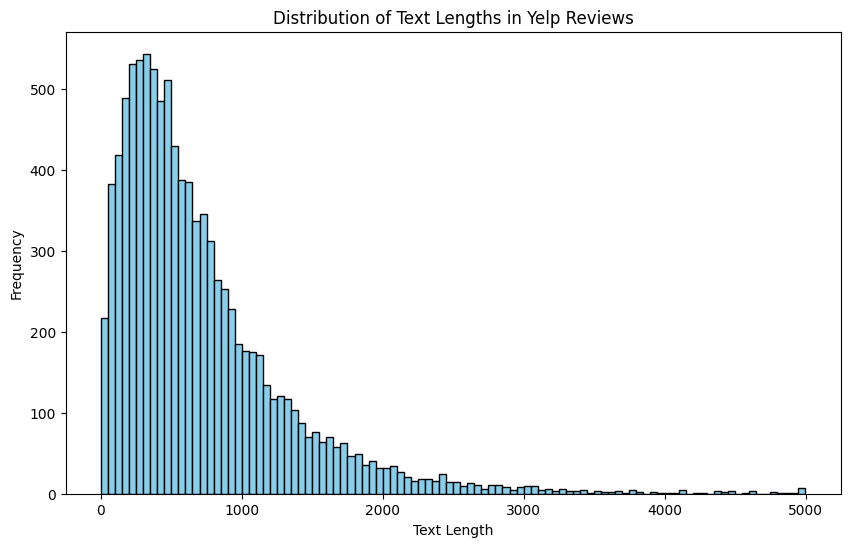

In [15]:
# Assuming df is your DataFrame containing the Yelp reviews
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths in Yelp Reviews')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [16]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
# save for later example
sample = df.loc[4]

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# define vocab , a vectorized version of our text column
# which will be cleaned by our text_process function automatically:

# vocab = CountVectorizer(analyzer=text_process).fit_transform(x)

In [20]:
# clean our text column:
df['text'] = df['text'].apply(text_process)

x = df['text']
y = df['stars']
print(x.head())
print(y.head())

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosie, dakota, love, chaparral, dog, park, co...
4    [general, manager, scott, petello, good, egg, ...
Name: text, dtype: object
0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64


In [21]:
# create a really long single string containing all of our cleaned reviews
entire_text = ' '.join(df['text'].apply(lambda row: ' '.join(row)))

In [22]:
entire_text

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy saturday morning looked like place fills pretty quickly earlier get better favor get bloody mary phenomenal simply best ive ever im pretty sure use ingredients garden blend fresh order amazing everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast ive ever anyway cant wait go back idea people give bad reviews place goes show please everyone probably griping something faultthere many people like case friend arrived 550 pm past sunday pretty crowded thought sunday evening thought would wait forever get seat said well seated girl comes back seating someone else seated 552 waiter came got drink orders everyone pleasant host seated us waiter server prices good well placed orders decided wanted 602 shared baked spa

In [23]:
len(entire_text)

4445398

4+ million chars

In [24]:
# creating a WORD CLOUD on cleaned text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black', stopwords = STOPWORDS).generate(entire_text)

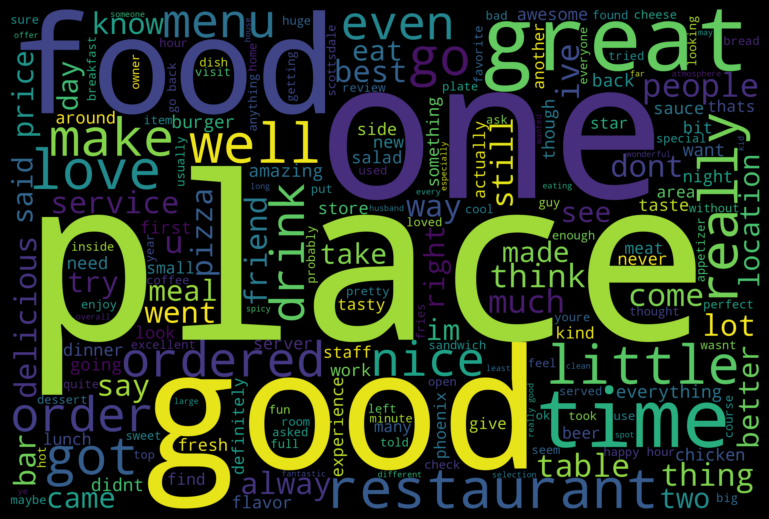

In [25]:
fig = plt.figure(
    figsize = (8, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Can't find many negative words.. what's the average review?

In [26]:
y.mean()

3.7775

The average review is almost 4 stars when it should ideally be 3, we should keep this in mind

In [27]:
X = df['text']
X

0       [wife, took, birthday, breakfast, excellent, w...
1       [idea, people, give, bad, reviews, place, goes...
2       [love, gyro, plate, rice, good, also, dig, can...
3       [rosie, dakota, love, chaparral, dog, park, co...
4       [general, manager, scott, petello, good, egg, ...
                              ...                        
9995    [first, visithad, lunch, today, used, groupon,...
9996    [called, house, deliciousness, could, go, item...
9997    [recently, visited, olive, ivy, business, last...
9998    [nephew, moved, scottsdale, recently, bunch, f...
9999    [45, locations, 45, star, average, think, ariz...
Name: text, Length: 10000, dtype: object

In [28]:
X = X.apply(lambda row: ' '.join(row))

In [29]:
# Split our vocab into x train/test,
# and our number of stars into y train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
y_train

9069    5
2603    5
7738    3
1579    5
5058    5
       ..
5734    4
5191    3
5390    4
860     5
7270    5
Name: stars, Length: 7000, dtype: int64

In [31]:
# Vectorize:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [32]:
# Naive Bayes:
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

MultinomialNB()

In [33]:
# Let the algorithm make predictions on the test reviews
nb_pred = nb.predict(x_test_tfidf)
nb_pred

array([4, 5, 4, ..., 5, 4, 4])

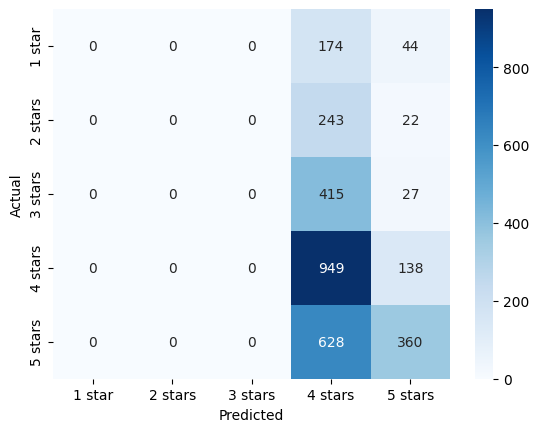

In [34]:
# Lets make a confusion matrix to visualize our algorithm's results
cmat1 = confusion_matrix(y_test, nb_pred)
sns.heatmap(cmat1, annot=True, fmt='d', cmap='Blues', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Random Forest:
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train_tfidf, y_train)

RandomForestClassifier()

In [36]:
rf_pred = rf.predict(x_test_tfidf)
rf_pred

array([4, 5, 4, ..., 5, 4, 4])

Random Forest scores noticeably better than Naive-Bayes

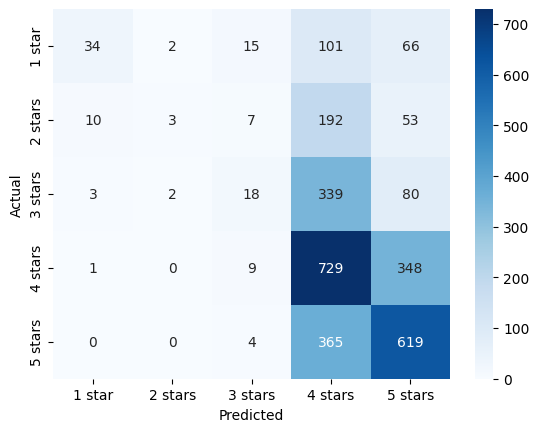

In [37]:
# Confusion matrix for Random Forest:
cmat2 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cmat2, annot=True, fmt='d', cmap='Blues', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# SVR: (similar to SVM, but outputs a continuous number instead of a
# discrete 1,2,3, 4, or 5). This will allow our algorithm to give in-between guesses (such as 3.6 stars)

# SVM:
svm = SVC(kernel='linear', C=1)
svm.fit(x_train_tfidf, y_train)
svm_pred = svm.predict(x_test_tfidf)
svm_pred

NameError: ignored

In [ ]:
print('Naive-Bayes Accuracy: ', accuracy_score(y_test, nb_pred))
print('\nRandom Forest Accuracy: ', accuracy_score(y_test, rf_pred))
print('\nSVM Accuracy: ', accuracy_score(y_test, svm_pred))

###SVM has the highest accuracy, Naive-Bayes has the lowest

In [ ]:
print('Actual ratings given: ')
print(df['stars'][:10])

print('\nSVM preds:')
print(svm_pred[:10])

print('\nRF preds:')
print(rf_pred[:10])

print('\nNB preds:')
print(nb_pred[:10])

####The one rating that stands out is the 2 given by SVM. Let's look at it more closely

In [ ]:
# Examining the 2.7 and 5 stars given by SVR when actual reviews were 5 and 4 stars respectively
print('Predicted 2 stars by SVM:', df['text'][9])

The review is definitely positive, SVM made an error for sure

In [ ]:
print(df['stars'][10:20])

print('\nSVM preds:')
print(svm_pred[10:20])

print('\nRF preds:')
print(rf_pred[10:20])

print('\nNB preds:')
print(nb_pred[10:20])

All 3 algorithms gave a 5 for review at index 18 when it was a 3 in reality. Let's see if the algorithms or the reviewer was off

In [ ]:
' '.join(df['text'][18])

####Doesn't sound like a raving review... all 3 algorithms were wrong yet again.

###Use sentiment analysis to identify how biased a review may be
ie: If someone gives 1 or 5 stars with seemingly no objective reasons

In [ ]:
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = X.apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
df['sentiment_score']

Perfect 5 star reviews have a sentiment score of around +1, and
perfect 1 star reviews have a sentiment score of around -1

###So now let's see if we can identify reviews where the reviewer's rating and their words don't seem to line up

In [ ]:
# Identifying false 5 star reviews:
p_thresh = .7

mismatched_reviews = df[(df['stars'] == 5) & (df['sentiment_score'] < p_thresh)] # Returns true if a 5star review has a sentiment score lower than .7
mismatched_reviews

###Let's look at some overly positive reviews:

In [ ]:
sorted_mismatched_reviews = mismatched_reviews.sort_values(by='sentiment_score', ascending=True)
# Get the bottom 5 reviews
bottom_5_reviews = sorted_mismatched_reviews.head(5)
bottom_5_reviews

In [ ]:
# lets look at one of these reviews and see if they deserve 5 stars
X[6276]

###Although these places received low sentiment scores and contain a lot of negative language, it would appear the 5 star reviews are warranted

In [ ]:
# Identifying false 1 star reviews:
n_thresh = -.7

n_mismatched_reviews = df[(df['stars'] == 1) & (df['sentiment_score'] > n_thresh)] # Returns true if a 1star review has a sentiment score higher than -.7
n_mismatched_reviews

In [ ]:
n_sorted_mismatched_reviews = n_mismatched_reviews.sort_values(by='sentiment_score', ascending=False)
# Get the top 5 most positive reviews
top_5_reviews = n_sorted_mismatched_reviews.head(5)
top_5_reviews

In [ ]:
X[1695]

"honestly lunch okay... ordered lime concoction coworker got stigmata holy strong good way"
It appears there are some redeeming aspects of this review but it was still given 1 star

In [ ]:
X[7213]

###"fish fresh perfectly prepared exceptionally good trout however wasnt good enough..." There is definitely some bias in this review as the person leaving the review said the food was amazing but they had to wait a long time for a table

# Conclusion: typical NLP algorithms don't seem to work very well, but sentiment analysis at least has something going for it. From the few samples we examined, sentiment analysis appears to be better at identifying false 1-star reviews over false 5-star reviews.



---

